Master 2 Bioinformatique 
Auteure : Lauryn Trouillot
Année : 2024 - 2025

# Projet Data science for bioinformatics 

In [178]:
# Impprtation des librairies
import math
import Activite_prep_1 as ap 
import numpy as np 

## Partie 1 – Prendre en main d’un jeu de données, nettoyage et curation

1. Importer votre jeu de données dans votre projet python.

In [179]:
# Importation du jeu de données 
water_df = ap.csv_to_dict("/home/lauryn/Datascience/6_water/water/data.csv", ",")

### 1.1 Identification des problèmes éventuels et vérification des types

Le jeu de donnée est composé de 2785 observations, voici les différentes variables observées : 

- **pH**: The pH level of the water.
- **Hardness**: Water hardness, a measure of mineral content.
- **Solids**: Total dissolved solids in the water.
- **Chloramines**: Chloramines concentration in the water.
- **Sulfate**: Sulfate concentration in the water.
- **Conductivity**: Electrical conductivity of the water.
- **Organic_carbon**: Organic carbon content in the water.
- **Trihalomethanes**: Trihalomethanes concentration in the water.
- **Turbidity**: Turbidity level, a measure of water clarity.
- **Potability**: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

The variable to predict is : **Potability**

In [180]:
##  Affichage de quelques lignes 
# Le nombre de ligne a afficher 
nb_ligne = 10

# Noms des colonnes 
for col in water_df.keys() :  
    print(col, end=' | ')
print("\n")

# Affichage des valeurs 
for i in range(nb_ligne) :
    for col in water_df.keys() : 
        valeur = water_df[col][i]
        if valeur == '' :
            print("NA", end= " | ")
        else : 
            print (valeur, end= " | " )
    print("\n")


ph | Hardness | Solids | Chloramines | Sulfate | Conductivity | Organic_carbon | Trihalomethanes | Turbidity | Potability | 

NA | 204.8904554713363 | 20791.318980747026 | 7.300211873184757 | 368.51644134980336 | 564.3086541722439 | 10.3797830780847 | 86.9909704615088 | 2.9631353806316407 | 0 | 

3.71608007538699 | 129.42292051494425 | 18630.057857970347 | 6.635245883862 | NA | 592.8853591348523 | 15.180013116357259 | 56.32907628451764 | 4.500656274942408 | 0 | 

8.099124189298397 | 224.23625939355776 | 19909.541732292393 | 9.275883602694089 | NA | 418.6062130644815 | 16.868636929550973 | 66.42009251176368 | 3.0559337496641685 | 0 | 

8.316765884214679 | 214.37339408562252 | 22018.417440775294 | 8.05933237743854 | 356.88613564305666 | 363.2665161642437 | 18.436524495493302 | 100.34167436508008 | 4.628770536837084 | 0 | 

9.092223456290965 | 181.10150923612525 | 17978.98633892625 | 6.546599974207941 | 310.13573752420444 | 398.41081338184466 | 11.558279443446395 | 31.997992727424737 | 4.

**Stratégie de nettoyage**
Je vais regarder le nombre de valeur manquante si le nombre est faible je pourrais supprimer les observation, sinon je vais regarder la moyenne, la médiane, l'écart-type, la valeur minimale et maximale de chacune des variables : 
- A partir de la moyenne, la médiane et l'écart type je vais pouvoir decider du traitement des valeurs manquantes 
- Les valeurs minimales et maximales vont me permettre d'identifier de potentielle valeur aberrante meme si un représentation graphique serait mieux. 

In [181]:
nb_observation = len(water_df["Hardness"])
print("Nombre d'observation total : " + str(nb_observation))
na = False
nb_na = 0
for i in range(nb_observation) :
    for col in water_df.keys() : 
        valeur = water_df[col][i]
        if valeur == '' :
            na = True
    if na : 
        nb_na += 1 
    na = False

print ("Le nombre d'observation incomplète : " + str(nb_na))

Nombre d'observation total : 3276
Le nombre d'observation incomplète : 1265


Plus d'un tier des données ont des observations manquantes 

In [182]:
# Importation du jeu de données 
water_df = np.array(list(water_df.values()))
water_df = np.where(water_df == '', None, water_df)
water_df = water_df.astype(object)
water_df = np.where(water_df == None, np.nan, water_df)
water_df = water_df.astype(float).transpose()

colnames = ["ph" , "Hardness" , "Solids", "Chloramines" , "Sulfate" , "Conductivity" , "Organic_carbon" , "Trihalomethanes" , "Turbidity" , "Potability"]
water_df.shape

(3276, 10)

In [183]:
water_df

array([[           nan, 2.04890455e+02, 2.07913190e+04, ...,
        8.69909705e+01, 2.96313538e+00, 0.00000000e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        5.63290763e+01, 4.50065627e+00, 0.00000000e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        6.64200925e+01, 3.05593375e+00, 0.00000000e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        6.98454003e+01, 3.29887550e+00, 1.00000000e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        7.74882131e+01, 4.70865847e+00, 1.00000000e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        7.86984463e+01, 2.30914906e+00, 1.00000000e+00]], shape=(3276, 10))

In [184]:
np.count_nonzero(np.isnan(water_df))

1434

In [185]:
for col in range(water_df.shape[1]) : 
    moyenne = np.nanmean(water_df[:, col])
    mediane = np.nanmedian(water_df[:, col])
    ec = np.nanstd(water_df[:, col])
    min_col = np.nanmin(water_df[:, col])
    max_col = np.nanmax(water_df[:, col])
    print(f"Colonne {colnames[col]}: Moyenne = {moyenne}, Médiane = {mediane}, Écart-type = {ec}, Valeur minimum = {min_col}, Valeur maximal = {max_col}")
    

Colonne ph: Moyenne = 7.080794504276835, Médiane = 7.036752103833548, Écart-type = 1.5940332597032338, Valeur minimum = 0.0, Valeur maximal = 13.999999999999998
Colonne Hardness: Moyenne = 196.36949601730154, Médiane = 196.96762686363073, Écart-type = 32.87474281466433, Valeur minimum = 47.432, Valeur maximal = 323.124
Colonne Solids: Moyenne = 22014.092526077104, Médiane = 20927.833606520187, Écart-type = 8767.23242117998, Valeur minimum = 320.942611274359, Valeur maximal = 61227.19600771213
Colonne Chloramines: Moyenne = 7.122276793425786, Médiane = 7.130298973883081, Écart-type = 1.5828432520255509, Valeur minimum = 0.3520000000000003, Valeur maximal = 13.127000000000002
Colonne Sulfate: Moyenne = 333.77577661081347, Médiane = 333.073545745888, Écart-type = 41.408539661817485, Valeur minimum = 129.00000000000003, Valeur maximal = 481.03064230599716
Colonne Conductivity: Moyenne = 426.20511068255325, Médiane = 421.88496828005435, Écart-type = 80.81172732448097, Valeur minimum = 181.4

Pour gerer les valeurs manquantes je vais utiliser le coefficient de variation : 
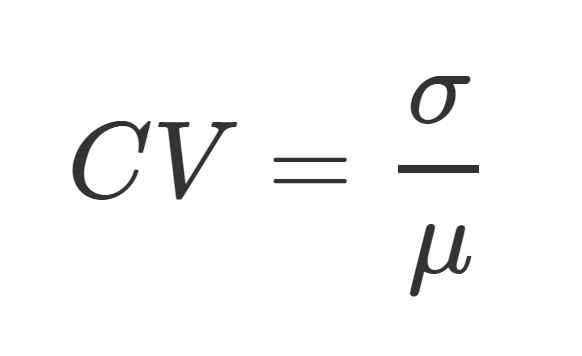
Etant sur des données biologiques il y a un plus grands risque de variabilité ainsi j'infererais la moyenne pour les observations manquantes ayant un CV inferieur a 0.3 
Pour les variables ayant un CV superieur je supprimerais les observations.  


Identification des variables catégorielles 

In [186]:
# Fonction pour identifier les valeurs categorielles 
def is_categorical(liste):
    '''
    docstring a faire 
    '''
    categorical = False
    types_uniques = set(type(element) for element in liste)
    categorical = (str in types_uniques or bool in types_uniques) or ((int in types_uniques or float in types_uniques) and len(set(liste)) <= 10)
    if categorical : 
        return set(element for element in liste)
    else : 
        return categorical

# Fonction pour identifier les valeurs continues 
def is_continuous(liste):
    if is_categorical(liste) == False : 
        return set(type(element) for element in liste)
    else :
        print("Cette variable n'est pas continue ")
        return False

# Fonction pour identifier les valeurs categorielles 
def categorical_or_continuous(liste):
    '''
    docstring a faire 
    '''
    categorical = False
    types_uniques = set(type(element) for element in liste)
    categorical = (str in types_uniques or bool in types_uniques) or ((int in types_uniques or float in types_uniques) and len(set(liste)) <= 10)
    if categorical : 
        return set(element for element in liste)
    else : 
        return set(type(element) for element in liste)

Verifions les variables de water_df

In [187]:
for col in range(water_df.shape[1]) : 
    print(f"Colonne {colnames[col]}: ")
    print(categorical_or_continuous(water_df[:, col].tolist()))
          

Colonne ph: 
{<class 'float'>}
Colonne Hardness: 
{<class 'float'>}
Colonne Solids: 
{<class 'float'>}
Colonne Chloramines: 
{<class 'float'>}
Colonne Sulfate: 
{<class 'float'>}
Colonne Conductivity: 
{<class 'float'>}
Colonne Organic_carbon: 
{<class 'float'>}
Colonne Trihalomethanes: 
{<class 'float'>}
Colonne Turbidity: 
{<class 'float'>}
Colonne Potability: 
{0.0, 1.0}


## Outillage

Les types ont l'air bon
Je vais creer la fonction de nettoyage de mon jeu de données 

In [188]:
def clean_data(numpy_table):
    '''
    docstring
    '''
    table_copy = np.copy(numpy_table)
    print("Avant nettoyage : ")
    print(f"Info tableau : {table_copy.shape}")
    for col in range(table_copy.shape[1]) : 
        if is_categorical != False : 
            moyenne = np.nanmean(table_copy[:, col])
            ec = np.nanstd(table_copy[:, col])
            CV = ec / moyenne
            if CV < 0.2 : 
                table_copy[:, col] = np.nan_to_num(table_copy[:, col], nan=moyenne)
    
    table_copy = table_copy[~np.isnan(table_copy).any(axis=1)]
    print("Après nettoyage : ")
    print(f"Info tableau : {table_copy.shape}")
    np.savetxt('data_CV20.csv', table_copy, delimiter=",")

    return table_copy

# Utilisation
cleaned_data = clean_data(water_df)


Avant nettoyage : 
Info tableau : (3276, 10)
Après nettoyage : 
Info tableau : (2649, 10)


Si une variable numérique contient en réalité un petit nombre de valeurs différentes, il suffit de convertir la classe de l’objet de numeric vers factor. Si, par contre, le nombre de valeurs différentes est important (dizaines ou plus) alors il va falloir créer des regroupements. C’est le découpage en classes abordé plus loin.

Il existe des normes pour les parametres de qualité de l'eau on peut les utiliser pour definir nos catégories : 
- **pH**
    - Entre 0 et 6,5 : eau acide
    - Entre 6,5 et 8,5 : eau potable
    - Entre 8,5 et 14 : eau basique

- **Dureté (TH)**
    - 0 - 5°f : eau très douce
    - 5 - 10°f : eau douce
    - 10 - 20°f : eau moyennement dure
    - 20 - 30°f : eau dure
    - 30°f : eau très dure

- **Solides dissous totaux**
    - < 300 mg/L : eau de faible minéralisation
    - 300 - 600 mg/L : eau de minéralisation moyenne
    - 600 mg/L : eau fortement minéralisée

- **Chloramines**
    - < 0,5 mg/L : niveau acceptable
    - 0,5 - 1 mg/L : niveau modéré
    - 1 mg/L : niveau élevé

- **Sulfates**
    - < 250 mg/L : concentration acceptable
    - 250 mg/L : concentration élevée

- **Conductivité**
    - < 200 µS/cm : faible minéralisation
    - 200 - 1000 µS/cm : minéralisation moyenne
    - 1000 µS/cm : forte minéralisation

- **Carbone organique**
    - < 2 mg/L : faible teneur
    - 2 - 4 mg/L : teneur moyenne
    - 4 mg/L : teneur élevée

- **Trihalométhanes**
    - < 80 µg/L : concentration acceptable
    - 80 µg/L : concentration élevée

- **Turbidité**
    - < 1 UNT : eau claire
    - 1 - 5 UNT : eau légèrement trouble
    - 5 UNT : eau trouble visible à l'œil nu

In [190]:
def continu_to_cate(numpy_table, col):
    table_copy = np.copy(numpy_table).astype(object)
    if col == 0:  # pH
        conditions = [
            (table_copy[:, col] >= 0) & (table_copy[:, col] < 6.5),
            (table_copy[:, col] >= 6.5) & (table_copy[:, col] < 8.5),
            (table_copy[:, col] >= 8.5) & (table_copy[:, col] <= 14)
        ]
        choices = ["Acide", "Neutre", "Basique"]
        table_copy[:, col] = np.select(conditions, choices, default="pH out of range")
    elif col == 1:  # Hardness
        conditions = [
            (table_copy[:, col] >= 0) & (table_copy[:, col] < 5),
            (table_copy[:, col] >= 5) & (table_copy[:, col] < 10),
            (table_copy[:, col] >= 10) & (table_copy[:, col] < 20),
            (table_copy[:, col] >= 20) & (table_copy[:, col] < 30),
            (table_copy[:, col] >= 30)
        ]
        choices = ["Tres douce", "Douce", "Moyennement dure", "Dure", "Tres dure"]
        table_copy[:, col] = np.select(conditions, choices, default="Hardness out of range")
    elif col == 2:  # Solids
        conditions = [
            (table_copy[:, col] < 300),
            (table_copy[:, col] >= 300) & (table_copy[:, col] < 600),
            (table_copy[:, col] >= 600)
        ]
        choices = ["Faible mineralisation", "Mineralisation moyenne", "Forte mineralisation"]
        table_copy[:, col] = np.select(conditions, choices, default="Solids out of range")
    elif col == 3:  # Chloramines
        conditions = [
            (table_copy[:, col] < 0.5),
            (table_copy[:, col] >= 0.5) & (table_copy[:, col] < 1),
            (table_copy[:, col] >= 1)
        ]
        choices = ["Acceptable", "Moderee", "Elevee"]
        table_copy[:, col] = np.select(conditions, choices, default="Chloramines out of range")
    elif col == 4:  # Sulfate
        conditions = [
            (table_copy[:, col] < 250),
            (table_copy[:, col] >= 250)
        ]
        choices = ["Acceptable", "Elevee"]
        table_copy[:, col] = np.select(conditions, choices, default="Sulfate out of range")
    elif col == 5:  # Conductivity
        conditions = [
            (table_copy[:, col] < 200),
            (table_copy[:, col] >= 200) & (table_copy[:, col] < 1000),
            (table_copy[:, col] >= 1000)
        ]
        choices = ["Faible", "Moyen", "Fort"]
        table_copy[:, col] = np.select(conditions, choices, default="Conductivity out of range")
    elif col == 6:  # Organic_carbon
        conditions = [
            (table_copy[:, col] < 2),
            (table_copy[:, col] >= 2) & (table_copy[:, col] < 4),
            (table_copy[:, col] >= 4)
        ]
        choices = ["Faible", "Moyen", "Fort"]
        table_copy[:, col] = np.select(conditions, choices, default="Organic_carbon out of range")
    elif col == 7:  # Trihalomethanes
        conditions = [
            (table_copy[:, col] < 80),
            (table_copy[:, col] >= 80)
        ]
        choices = ["Acceptable", "Elevee"]
        table_copy[:, col] = np.select(conditions, choices, default="Trihalomethanes out of range")
    elif col == 8:  # Turbidity
        conditions = [
            (table_copy[:, col] < 1),
            (table_copy[:, col] >= 1) & (table_copy[:, col] < 5),
            (table_copy[:, col] >= 5)
        ]
        choices = ["Eau clair", "Eau légerement trouble", "Eau trouble"]
        table_copy[:, col] = np.select(conditions, choices, default="Turbidity out of range")
    else:
        print("Cette colonne n'existe pas")
    return table_copy

test = continu_to_cate(cleaned_data, 0)
test 

array([['Acide', 129.42292051494425, 18630.057857970347, ...,
        56.32907628451764, 4.500656274942408, 0.0],
       ['Neutre', 224.23625939355776, 19909.541732292393, ...,
        66.42009251176368, 3.0559337496641685, 0.0],
       ['Neutre', 214.37339408562252, 22018.417440775294, ...,
        100.34167436508008, 4.628770536837084, 0.0],
       ...,
       ['Basique', 175.76264629629543, 33155.578218312294, ...,
        69.84540029205144, 3.298875498646556, 1.0],
       ['Acide', 230.60375750846123, 11983.869376336363, ...,
        77.48821310275477, 4.708658467526655, 1.0],
       ['Neutre', 195.10229858610904, 17404.17706105066, ...,
        78.69844632549504, 2.309149056634923, 1.0]],
      shape=(2649, 10), dtype=object)

Pour transformer des variables catégorielle en variable continue on peut simplement convertir les chaines de caractère en nombre 
Dans mon jeu de donnée c'est deja fait 